# YAP471 Project - Zeynep Meriç Aşık - 201410026

In [1]:
!pip install -r requirements.txt

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense, LSTM
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
np.random.seed(12345)

In [3]:
dataset = pd.read_csv("AAPL.csv")
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


In [4]:
date = dataset["Date"]
date

0        1980-12-12
1        1980-12-15
2        1980-12-16
3        1980-12-17
4        1980-12-18
            ...    
10404    2022-03-18
10405    2022-03-21
10406    2022-03-22
10407    2022-03-23
10408    2022-03-24
Name: Date, Length: 10409, dtype: object

In [5]:
dataset.set_index('Date', inplace=True)
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...
2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000


## Data Visualization

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10409 entries, 1980-12-12 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10409 non-null  float64
 1   High       10409 non-null  float64
 2   Low        10409 non-null  float64
 3   Close      10409 non-null  float64
 4   Adj Close  10409 non-null  float64
 5   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 569.2+ KB


In [7]:
dataset.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10409.000000,10409.000000,10409.000000,10409.000000,10409.000000,1.040900e+04
mean,13.959910,14.111936,13.809163,13.966757,13.350337,3.321778e+08
std,30.169244,30.514878,29.835055,30.191696,29.911132,3.393344e+08
min,0.049665,0.049665,0.049107,0.049107,0.038384,0.000000e+00
25%,0.281964,0.287946,0.274554,0.281250,0.234799,1.247604e+08
50%,0.468750,0.477679,0.459821,0.468750,0.386853,2.199680e+08
75%,14.217857,14.364286,14.043571,14.206071,12.188149,4.126108e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,7.421641e+09


In [10]:
std = pd.Series.sort_values(dataset.describe().loc["std"])
std

Low          2.983506e+01
Adj Close    2.991113e+01
Open         3.016924e+01
Close        3.019170e+01
High         3.051488e+01
Volume       3.393344e+08
Name: std, dtype: float64

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([2.98350550e+01, 1.69667493e+07, 3.39334687e+07, 5.09001881e+07,
        6.78669076e+07, 8.48336270e+07, 1.01800346e+08, 1.18767066e+08,
        1.35733785e+08, 1.52700505e+08, 1.69667224e+08, 1.86633944e+08,
        2.03600663e+08, 2.20567383e+08, 2.37534102e+08, 2.54500821e+08,
        2.71467541e+08, 2.88434260e+08, 3.05400980e+08, 3.22367699e+08,
        3.39334419e+08]),
 <BarContainer object of 20 artists>)

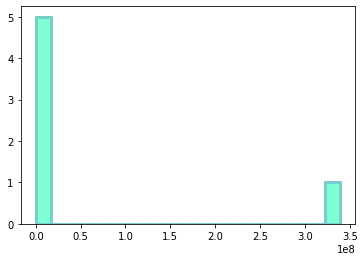

In [11]:
plt.hist(std , color="#7FFFD4" , ec="#79CDCD" , lw=3 , bins=20)

(array([7.453e+03, 6.120e+02, 6.640e+02, 4.530e+02, 3.280e+02, 2.170e+02,
        9.600e+01, 6.800e+01, 6.100e+01, 1.800e+01, 2.300e+01, 6.000e+00,
        5.500e+01, 7.800e+01, 8.000e+01, 3.700e+01, 7.000e+01, 3.000e+01,
        2.700e+01, 3.300e+01]),
 array([4.91070000e-02, 9.00265140e+00, 1.79561958e+01, 2.69097402e+01,
        3.58632846e+01, 4.48168290e+01, 5.37703734e+01, 6.27239178e+01,
        7.16774622e+01, 8.06310066e+01, 8.95845510e+01, 9.85380954e+01,
        1.07491640e+02, 1.16445184e+02, 1.25398729e+02, 1.34352273e+02,
        1.43305817e+02, 1.52259362e+02, 1.61212906e+02, 1.70166451e+02,
        1.79119995e+02]),
 <BarContainer object of 20 artists>)

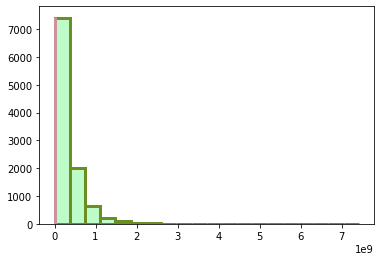

In [12]:
plt.hist(dataset["Volume"] , color="#BDFCC9" , ec="#6B8E23" , lw=3 , bins=20)
plt.hist(dataset["Low"] , color="#FFC0CB" , ec="#CD919E" , lw=3 , bins=20)

*For comparison of the column with the highest standard deviation (Volume) to the lowest (Low).

C:\Users\Asus\AppData\Local\Temp\ipykernel_8412\3107041045.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


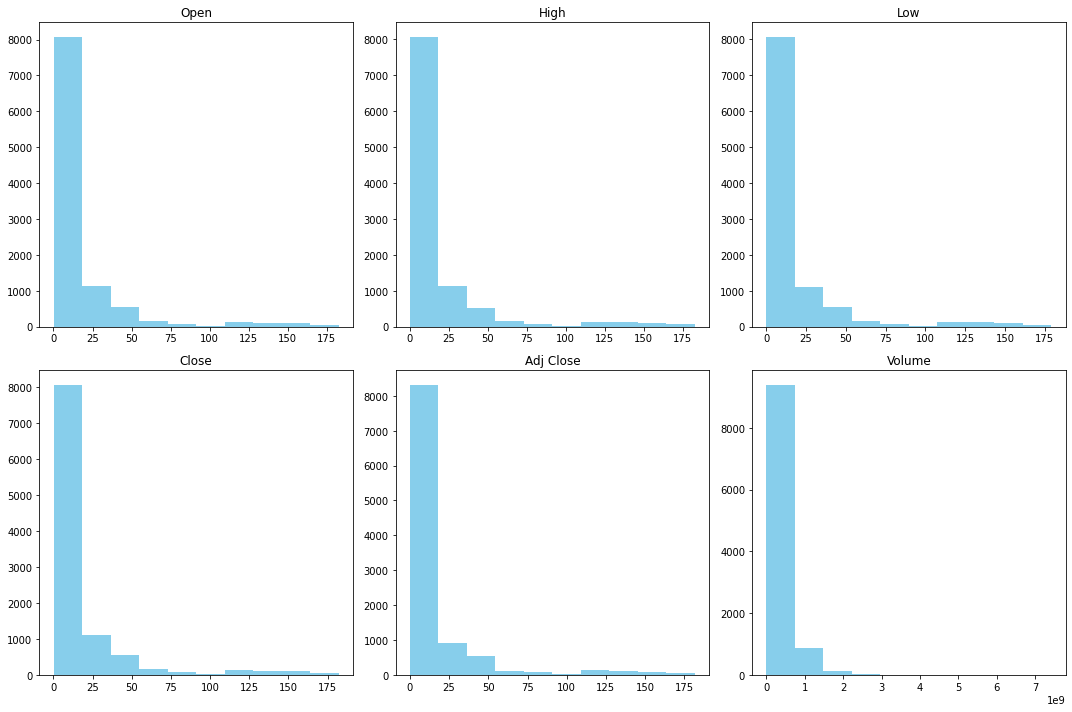

In [13]:
figure, axis = plt.subplots(2,3)
figure.set_figheight(10)
figure.set_figwidth(15)
for n in range(len(dataset.columns)):
    col = n % 3
    row = n // 3
    axis[row,col].hist(dataset[dataset.columns[n]], color = "skyblue", lw=0)
    axis[row,col].title.set_text(dataset.columns[n])
    figure.tight_layout()
figure.show()

In [14]:
dataset.shape

(10409, 6)

In [15]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...
2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000


In [16]:
y = dataset["Adj Close"]
X = dataset.drop(['Adj Close'] , axis=1)

In [17]:
y

Date
1980-12-12      0.100323
1980-12-15      0.095089
1980-12-16      0.088110
1980-12-17      0.090291
1980-12-18      0.092908
                 ...    
2022-03-18    163.979996
2022-03-21    165.380005
2022-03-22    168.820007
2022-03-23    170.210007
2022-03-24    174.070007
Name: Adj Close, Length: 10409, dtype: float64

In [18]:
X

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...
2022-03-18,160.509995,164.479996,159.759995,163.979996,123351200
2022-03-21,163.509995,166.350006,163.009995,165.380005,95811400
2022-03-22,165.509995,169.419998,164.910004,168.820007,81532000


## Models

### Random Forest

In [23]:
tscv = TimeSeriesSplit(n_splits=10)
random_forest = RandomForestRegressor()
rf_predictions = []
metrics = []

for fold_num, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    rf_predictions.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    metrics.append({'Fold': f'Fold {fold_num}', 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'Explained Variance': evs, 'MAPE': mape})

metrics_df = pd.DataFrame(metrics).set_index('Fold')
metrics_df

,MSE,RMSE,MAE,R-squared,Explained Variance,MAPE
Fold,,,,,,
Fold 1,0.002500,0.050000,0.025861,0.743018,0.810809,0.085346
Fold 2,0.000465,0.021570,0.011915,0.892448,0.925184,0.031605
Fold 3,0.000206,0.014338,0.013348,0.963241,0.995100,0.046128
Fold 4,0.000158,0.012579,0.012052,0.975897,0.998024,0.061352
Fold 5,0.024629,0.156937,0.081308,0.568887,0.684606,0.111041
Fold 6,0.533431,0.730363,0.469679,0.196637,0.528056,0.228430
Fold 7,8.803444,2.967060,2.327398,-1.523295,0.026818,0.372308
Fold 8,42.895575,6.549471,5.530711,-2.484069,0.000397,0.324708
Fold 9,99.397248,9.969817,7.485537,-1.143414,0.064804,0.212732


In [24]:
metrics_df.mean()

MSE                   420.209604
RMSE                    8.411519
MAE                     6.311143
R-squared              -0.195017
Explained Variance      0.506863
MAPE                    0.185857
dtype: float64

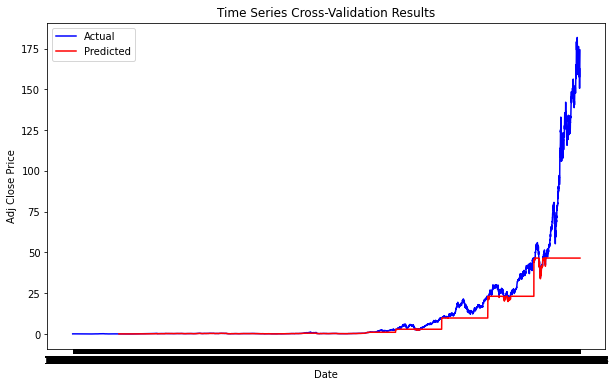

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(y.index[-len(rf_predictions):], rf_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Time Series Cross-Validation Results')
plt.legend()
plt.show()

### Linear Regression

In [26]:
tscv = TimeSeriesSplit(n_splits=5)
linear_reg = LinearRegression()
lr_predictions = []
metrics = []

for fold_num, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    linear_reg.fit(X_train, y_train)
    y_pred = linear_reg.predict(X_test)
    lr_predictions.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    metrics.append({'Fold': f'Fold {fold_num}', 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'Explained Variance': evs, 'MAPE': mape})

metrics_df = pd.DataFrame(metrics).set_index('Fold')
metrics_df

,MSE,RMSE,MAE,R-squared,Explained Variance,MAPE
Fold,,,,,,
Fold 1,0.000164,0.012792,0.010982,0.969673,0.992026,0.034736
Fold 2,0.000437,0.020913,0.018399,0.990448,0.997842,0.059262
Fold 3,0.001180,0.034355,0.026162,0.999528,0.999796,0.023643
Fold 4,0.269376,0.519014,0.264591,0.994303,0.995740,0.012753
Fold 5,72.928385,8.539812,6.340583,0.963568,0.983652,0.082929


In [27]:
metrics_df.mean()

MSE                   14.639908
RMSE                   1.825377
MAE                    1.332143
R-squared              0.983504
Explained Variance     0.993811
MAPE                   0.042664
dtype: float64

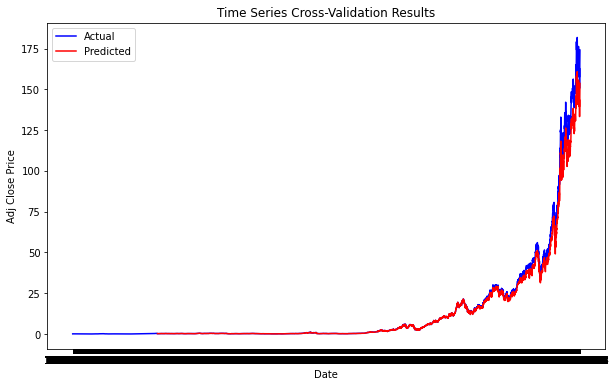

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(y.index[-len(lr_predictions):], lr_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Time Series Cross-Validation Results')
plt.legend()
plt.show()

### Decision Trees

In [29]:
tscv = TimeSeriesSplit(n_splits=10)
decision_tree = DecisionTreeRegressor()
tree_predictions = []
metrics = []

for fold_num, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    tree_predictions.extend(y_pred) 
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    metrics.append({'Fold': f'Fold {fold_num}', 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'Explained Variance': evs, 'MAPE': mape})

metrics_df = pd.DataFrame(metrics).set_index('Fold')
metrics_df

,MSE,RMSE,MAE,R-squared,Explained Variance,MAPE
Fold,,,,,,
Fold 1,0.002325,0.048214,0.024685,0.761047,0.822494,0.081302
Fold 2,0.000404,0.020097,0.011361,0.906635,0.936230,0.030399
Fold 3,0.000224,0.014955,0.013590,0.960012,0.993005,0.046670
Fold 4,0.000191,0.013835,0.012065,0.970846,0.992781,0.061304
Fold 5,0.023656,0.153804,0.079421,0.585931,0.695367,0.108566
Fold 6,0.534479,0.731081,0.470231,0.195059,0.527431,0.228909
Fold 7,8.674858,2.945311,2.302347,-1.486439,0.029998,0.367292
Fold 8,42.847478,6.545798,5.525134,-2.480163,-0.000749,0.324297
Fold 9,97.857232,9.892281,7.390570,-1.110205,0.067413,0.209570


In [30]:
metrics_df.mean()

MSE                   418.777525
RMSE                    8.390933
MAE                     6.287119
R-squared              -0.183014
Explained Variance      0.509984
MAPE                    0.184195
dtype: float64

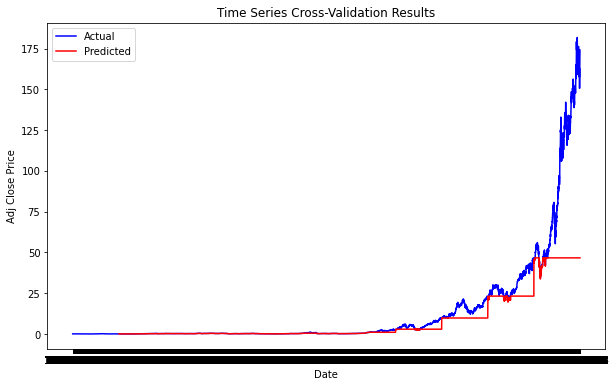

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(y.index[-len(tree_predictions):], tree_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Time Series Cross-Validation Results')
plt.legend()
plt.show()

### Support Vector Regression (SVR)

In [32]:
tscv = TimeSeriesSplit(n_splits=10)
svr = SVR()
svr_predictions = []
metrics = []

for fold_num, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    svr_predictions.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    metrics.append({'Fold': f'Fold {fold_num}', 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'Explained Variance': evs, 'MAPE': mape})

metrics_df = pd.DataFrame(metrics).set_index('Fold')
metrics_df

,MSE,RMSE,MAE,R-squared,Explained Variance,MAPE
Fold,,,,,,
Fold 1,0.010963,0.104705,0.081678,-0.126942,-2.220446e-16,0.531759
Fold 2,0.026369,0.162385,0.148120,-5.095650,-2.389752e-02,0.442304
Fold 3,0.018209,0.134942,0.112985,-2.255919,-4.405813e-02,0.326868
Fold 4,0.006539,0.080863,0.063926,0.003974,1.317802e-02,0.334568
Fold 5,0.096339,0.310386,0.201802,-0.686327,6.404777e-03,0.335377
Fold 6,1.624632,1.274611,0.994309,-1.446745,4.186496e-02,0.623309
Fold 7,23.961414,4.895040,4.461890,-5.867963,-1.616799e-01,0.822348
Fold 8,226.089102,15.036260,14.586265,-17.363434,-8.268933e-02,0.946457
Fold 9,957.124493,30.937429,30.171643,-19.639545,-9.124006e-03,0.990939


In [33]:
metrics_df.mean()

MSE                   1170.894775
RMSE                    15.540608
MAE                     14.358925
R-squared               -5.702484
Explained Variance      -0.026063
MAPE                     0.635010
dtype: float64

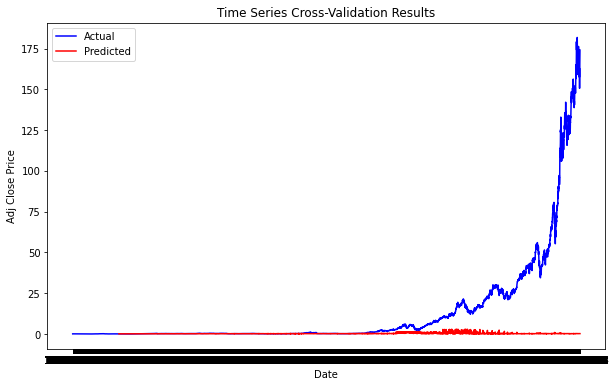

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(y.index[-len(svr_predictions):], svr_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Time Series Cross-Validation Results')
plt.legend()
plt.show()

### Neural Networks

In [35]:
tscv = TimeSeriesSplit(n_splits=7)
nn_predictions = []
metrics = []

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

for fold_num, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    y_pred = model.predict(X_test)
    y_pred = np.squeeze(y_pred)
    nn_predictions.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    metrics.append({'Fold': f'Fold {fold_num}', 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'Explained Variance': evs, 'MAPE': mape})

metrics_df = pd.DataFrame(metrics).set_index('Fold')
metrics_df

41/41 [==============================] - 1s 2ms/step


,MSE,RMSE,MAE,R-squared,Explained Variance,MAPE
Fold,,,,,,
Fold 1,0.017894,0.133770,0.121381,-1.717440,0.519977,0.431081
Fold 2,0.000178,0.013330,0.012258,0.972872,0.995340,0.041328
Fold 3,0.000535,0.023122,0.020383,0.990966,0.997940,0.072572
Fold 4,0.001004,0.031684,0.018946,0.997837,0.998039,0.022517
Fold 5,0.013185,0.114828,0.092227,0.998473,0.998882,0.016512
Fold 6,9.663285,3.108583,2.497311,0.633790,0.870084,0.104877
Fold 7,2263.252434,47.573653,31.433458,-0.144936,0.354906,0.280480


In [36]:
metrics_df.mean()

MSE                   324.706931
RMSE                    7.285567
MAE                     4.885138
R-squared               0.390223
Explained Variance      0.819310
MAPE                    0.138481
dtype: float64

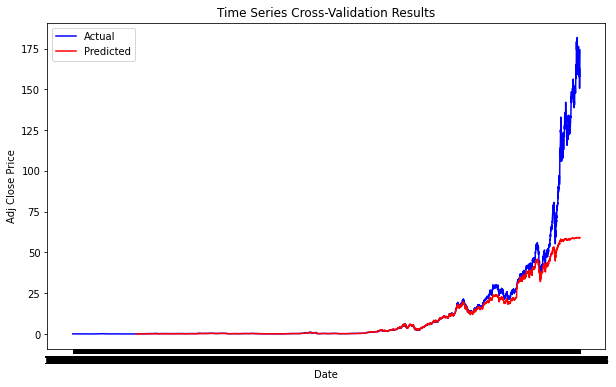

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(y.index[-len(nn_predictions):], nn_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Time Series Cross-Validation Results')
plt.legend()
plt.show()

### XGBRegressor

In [38]:
tscv = TimeSeriesSplit(n_splits=10)
xgb_regressor = XGBRegressor()
xgb_predictions = []
metrics = []

for fold_num, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_regressor.fit(X_train, y_train)
    y_pred = xgb_regressor.predict(X_test)
    xgb_predictions.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    metrics.append({'Fold': f'Fold {fold_num}', 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'Explained Variance': evs, 'MAPE': mape})

metrics_df = pd.DataFrame(metrics).set_index('Fold')
metrics_df

,MSE,RMSE,MAE,R-squared,Explained Variance,MAPE
Fold,,,,,,
Fold 1,0.002385,0.048834,0.025476,0.754864,0.818847,0.086570
Fold 2,0.000427,0.020666,0.011747,0.901271,0.932732,0.031515
Fold 3,0.000205,0.014309,0.013195,0.963391,0.994473,0.045839
Fold 4,0.000161,0.012690,0.011891,0.975471,0.996939,0.060879
Fold 5,0.024703,0.157172,0.081189,0.567598,0.682607,0.110502
Fold 6,0.527172,0.726066,0.465601,0.206064,0.532023,0.225686
Fold 7,8.690040,2.947887,2.306183,-1.490791,0.030911,0.368192
Fold 8,42.852290,6.546166,5.526640,-2.480554,0.000253,0.324424
Fold 9,99.125731,9.956191,7.462281,-1.137559,0.062590,0.211886


In [39]:
metrics_df.mean()

MSE                   419.220521
RMSE                    8.399870
MAE                     6.296899
R-squared              -0.187477
Explained Variance      0.508671
MAPE                    0.184933
dtype: float64

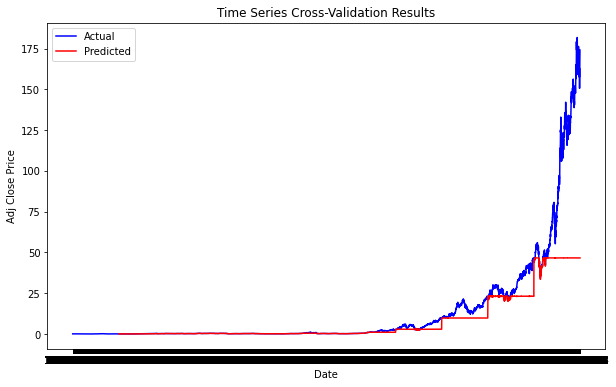

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(y.index[-len(xgb_predictions):], xgb_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Time Series Cross-Validation Results')
plt.legend()
plt.show()

### LGBMRegressor

In [41]:
tscv = TimeSeriesSplit(n_splits=10)
lgbm_reg = LGBMRegressor()
lgbm_predictions = []
metrics = []

for fold_num, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lgbm_reg.fit(X_train, y_train)
    y_pred = lgbm_reg.predict(X_test)
    lgbm_predictions.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    metrics.append({'Fold': f'Fold {fold_num}', 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'Explained Variance': evs, 'MAPE': mape})

metrics_df = pd.DataFrame(metrics).set_index('Fold')
metrics_df

,MSE,RMSE,MAE,R-squared,Explained Variance,MAPE
Fold,,,,,,
Fold 1,0.003157,0.056192,0.030100,0.675430,0.767104,0.100759
Fold 2,0.000763,0.027622,0.014115,0.823619,0.869283,0.036462
Fold 3,0.000203,0.014254,0.013243,0.963672,0.995026,0.045713
Fold 4,0.000158,0.012555,0.011969,0.975991,0.997809,0.061061
Fold 5,0.026444,0.162617,0.084273,0.537118,0.661387,0.114632
Fold 6,0.586619,0.765910,0.502811,0.116535,0.492899,0.247987
Fold 7,9.687328,3.112447,2.488884,-1.776640,-0.005069,0.404408
Fold 8,43.966893,6.630754,5.627390,-2.571084,0.000864,0.331369
Fold 9,105.374143,10.265191,7.827480,-1.272300,0.046528,0.223921


In [42]:
metrics_df.mean()

MSE                   430.742092
RMSE                    8.545077
MAE                     6.463333
R-squared              -0.271859
Explained Variance      0.485323
MAPE                    0.196181
dtype: float64

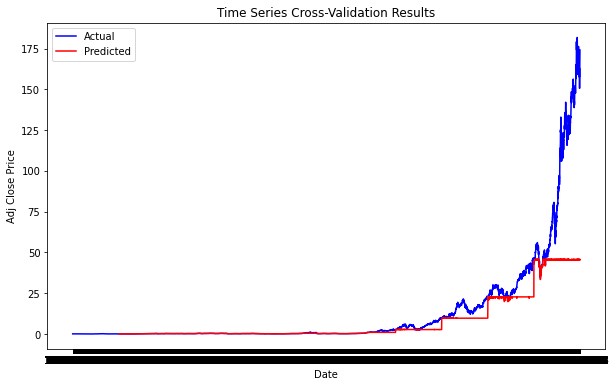

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(y.index[-len(lgbm_predictions):], lgbm_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Time Series Cross-Validation Results')
plt.legend()
plt.show()

### AdaBoostRegressor

In [44]:
tscv = TimeSeriesSplit(n_splits=10)
adaboost_reg = AdaBoostRegressor()
ada_predictions = []
metrics = []

for fold_num, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    adaboost_reg.fit(X_train, y_train)
    y_pred = adaboost_reg.predict(X_test)
    ada_predictions.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    metrics.append({'Fold': f'Fold {fold_num}', 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'Explained Variance': evs, 'MAPE': mape})

metrics_df = pd.DataFrame(metrics).set_index('Fold')
metrics_df

,MSE,RMSE,MAE,R-squared,Explained Variance,MAPE
Fold,,,,,,
Fold 1,0.002758,0.052515,0.028899,0.716517,0.796242,0.107189
Fold 2,0.000578,0.024037,0.013381,0.866440,0.903705,0.035470
Fold 3,0.000165,0.012865,0.011488,0.970409,0.993280,0.038699
Fold 4,0.000229,0.015123,0.013957,0.965162,0.994836,0.074854
Fold 5,0.025887,0.160895,0.084719,0.546870,0.672501,0.117882
Fold 6,0.565728,0.752149,0.491516,0.147997,0.510377,0.244819
Fold 7,9.091196,3.015161,2.383537,-1.605772,0.015091,0.383723
Fold 8,48.531764,6.966474,6.018293,-2.941852,0.000000,0.358219
Fold 9,116.732509,10.804282,8.468358,-1.517234,0.029196,0.245347


In [45]:
metrics_df.mean()

MSE                   449.352964
RMSE                    8.751939
MAE                     6.711112
R-squared              -0.313262
Explained Variance      0.493272
MAPE                    0.202076
dtype: float64

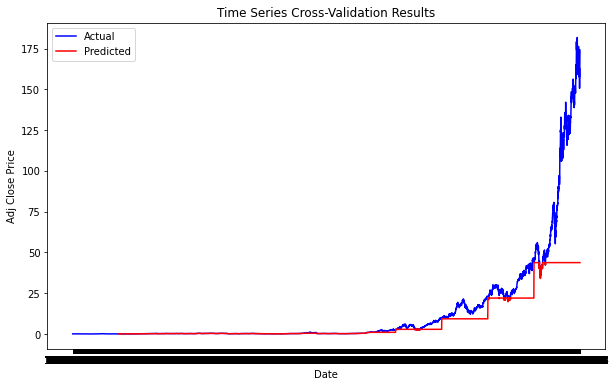

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(y.index[-len(ada_predictions):], ada_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Time Series Cross-Validation Results')
plt.legend()
plt.show()

### KNeighborsRegressor

In [50]:
tscv = TimeSeriesSplit(n_splits=5)
k_neighbors = KNeighborsRegressor()
k_predictions = []
metrics = []

for fold_num, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    k_neighbors.fit(X_train, y_train)
    y_pred = k_neighbors.predict(X_test)
    k_predictions.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    metrics.append({'Fold': f'Fold {fold_num}', 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'Explained Variance': evs, 'MAPE': mape})

metrics_df = pd.DataFrame(metrics).set_index('Fold')
metrics_df

,MSE,RMSE,MAE,R-squared,Explained Variance,MAPE
Fold,,,,,,
Fold 1,0.041450,0.203592,0.185916,-6.681825,-0.297025,0.567899
Fold 2,0.057071,0.238896,0.151134,-0.246409,-0.037552,0.406504
Fold 3,4.048193,2.012012,1.294209,-0.618512,0.017610,0.578904
Fold 4,194.726617,13.954448,11.922286,-3.118454,-0.120655,0.866788
Fold 5,6093.321749,78.059732,63.689358,-2.043974,-0.017595,0.966474


In [51]:
metrics_df.mean()

MSE                   1258.439016
RMSE                    18.893736
MAE                     15.448580
R-squared               -2.541835
Explained Variance      -0.091043
MAPE                     0.677314
dtype: float64

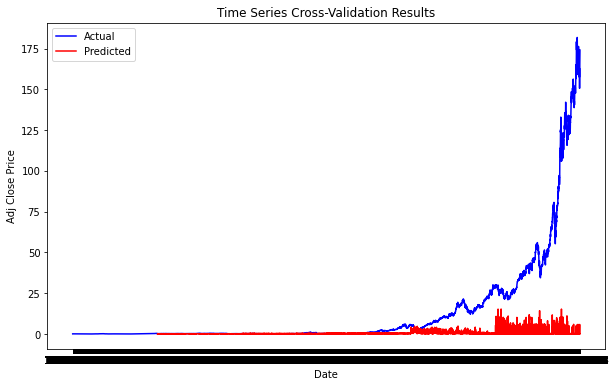

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(y.index[-len(k_predictions):], k_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Time Series Cross-Validation Results')
plt.legend()
plt.show()

### BaggingRegressor

In [53]:
tscv = TimeSeriesSplit(n_splits=10)
bagging_regressor = BaggingRegressor(base_estimator=RandomForestRegressor())
bag_predictions = []
metrics = []

for fold_num, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    bagging_regressor.fit(X_train, y_train)
    y_pred = bagging_regressor.predict(X_test)
    bag_predictions.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    metrics.append({'Fold': f'Fold {fold_num}', 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'Explained Variance': evs, 'MAPE': mape})

metrics_df = pd.DataFrame(metrics).set_index('Fold')
metrics_df

,MSE,RMSE,MAE,R-squared,Explained Variance,MAPE
Fold,,,,,,
Fold 1,0.002578,0.050770,0.026425,0.735038,0.805744,0.087546
Fold 2,0.000536,0.023154,0.012556,0.876064,0.912360,0.033027
Fold 3,0.000206,0.014363,0.013396,0.963111,0.995197,0.046306
Fold 4,0.000160,0.012646,0.012193,0.975641,0.998287,0.061833
Fold 5,0.025249,0.158899,0.082448,0.558044,0.677032,0.112571
Fold 6,0.540391,0.735113,0.474021,0.186155,0.523562,0.231175
Fold 7,8.881379,2.980164,2.342332,-1.545634,0.024935,0.375292
Fold 8,43.058448,6.561894,5.545416,-2.497298,0.000404,0.325718
Fold 9,100.682273,10.034056,7.562743,-1.171124,0.062038,0.215294


In [54]:
metrics_df.mean()

MSE                   422.363857
RMSE                    8.437112
MAE                     6.341412
R-squared              -0.207009
Explained Variance      0.503314
MAPE                    0.187597
dtype: float64

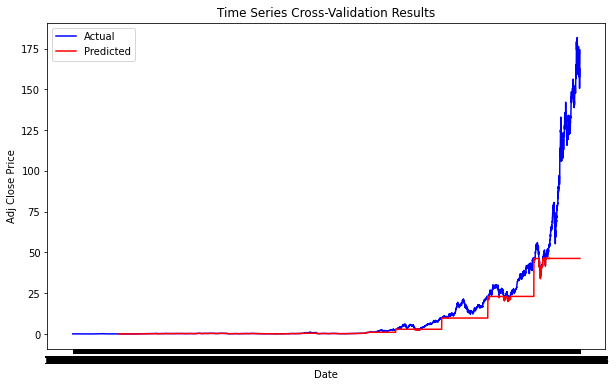

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(y.index[-len(bag_predictions):], bag_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Time Series Cross-Validation Results')
plt.legend()
plt.show()

### GradientBoostingRegressor

In [56]:
tscv = TimeSeriesSplit(n_splits=10)
gradient_boosting = GradientBoostingRegressor()
grad_predictions = []
metrics = []

for fold_num, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    gradient_boosting.fit(X_train, y_train)
    y_pred = gradient_boosting.predict(X_test)
    grad_predictions.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    metrics.append({'Fold': f'Fold {fold_num}', 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'Explained Variance': evs, 'MAPE': mape})

metrics_df = pd.DataFrame(metrics).set_index('Fold')
metrics_df

,MSE,RMSE,MAE,R-squared,Explained Variance,MAPE
Fold,,,,,,
Fold 1,0.002333,0.048301,0.024785,0.760185,0.821991,0.082276
Fold 2,0.000407,0.020178,0.011429,0.905875,0.936005,0.030626
Fold 3,0.000203,0.014250,0.013210,0.963692,0.994871,0.045757
Fold 4,0.000156,0.012496,0.012080,0.976213,0.998442,0.061615
Fold 5,0.024253,0.155734,0.080499,0.575473,0.688858,0.110323
Fold 6,0.520741,0.721624,0.462019,0.215748,0.536768,0.224523
Fold 7,8.731226,2.954865,2.312240,-1.502596,0.028313,0.369162
Fold 8,42.903640,6.550087,5.531325,-2.484724,0.000306,0.324747
Fold 9,99.351598,9.967527,7.489832,-1.142430,0.066798,0.212933


In [57]:
metrics_df.mean()

MSE                   420.236419
RMSE                    8.409119
MAE                     6.309778
R-squared              -0.187229
Explained Variance      0.510742
MAPE                    0.184699
dtype: float64

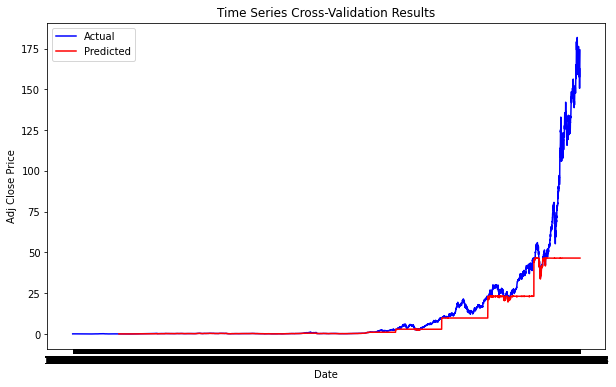

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(y.index[-len(grad_predictions):], grad_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Time Series Cross-Validation Results')
plt.legend()
plt.show()

### ExtraTreesRegressor

In [59]:
tscv = TimeSeriesSplit(n_splits=10)
extra_trees = ExtraTreesRegressor()
ext_predictions = []
metrics = []

for fold_num, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    extra_trees.fit(X_train, y_train)
    y_pred = extra_trees.predict(X_test)
    ext_predictions.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    metrics.append({'Fold': f'Fold {fold_num}', 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'Explained Variance': evs, 'MAPE': mape})

metrics_df = pd.DataFrame(metrics).set_index('Fold')
metrics_df

,MSE,RMSE,MAE,R-squared,Explained Variance,MAPE
Fold,,,,,,
Fold 1,0.002358,0.048562,0.024858,0.757588,0.820369,0.081725
Fold 2,0.000421,0.020520,0.011509,0.902659,0.933183,0.030708
Fold 3,0.000203,0.014246,0.013212,0.963711,0.994923,0.045794
Fold 4,0.000158,0.012571,0.012032,0.975929,0.997982,0.061343
Fold 5,0.024129,0.155336,0.080594,0.577638,0.691317,0.110821
Fold 6,0.529075,0.727376,0.466827,0.203197,0.530956,0.226741
Fold 7,8.707593,2.950863,2.308924,-1.495822,0.029742,0.368644
Fold 8,42.741589,6.537705,5.516622,-2.471562,0.000251,0.323736
Fold 9,98.148826,9.907009,7.410975,-1.116493,0.067753,0.210255


In [60]:
metrics_df.mean()

MSE                   419.703657
RMSE                    8.398930
MAE                     6.296827
R-squared              -0.184080
Explained Variance      0.510163
MAPE                    0.184433
dtype: float64

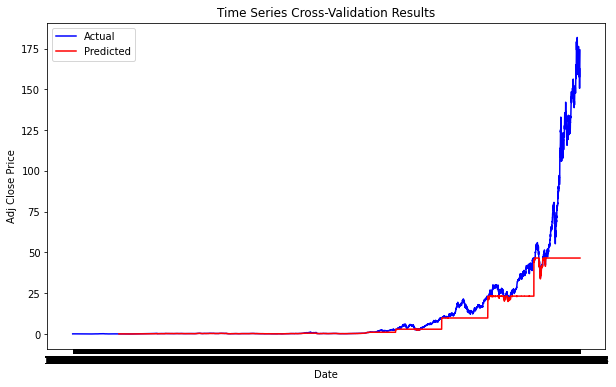

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(y.index[-len(ext_predictions):], ext_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Time Series Cross-Validation Results')
plt.legend()
plt.show()

### DummyRegressor

In [62]:
tscv = TimeSeriesSplit(n_splits=5)
dummy_regressor = DummyRegressor(strategy='mean')
dummy_predictions = []
metrics = []

for fold_num, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    dummy_regressor.fit(X_train, y_train)
    y_pred = dummy_regressor.predict(X_test)
    dummy_predictions.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    metrics.append({'Fold': f'Fold {fold_num}', 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'Explained Variance': evs, 'MAPE': mape})

metrics_df = pd.DataFrame(metrics).set_index('Fold')
metrics_df

,MSE,RMSE,MAE,R-squared,Explained Variance,MAPE
Fold,,,,,,
Fold 1,0.045021,0.212182,0.199062,-7.343784,0.000000e+00,0.613208
Fold 2,0.059546,0.244021,0.151575,-0.300460,-2.220446e-16,0.376985
Fold 3,4.271890,2.066855,1.337499,-0.707948,0.000000e+00,0.574295
Fold 4,197.031188,14.036780,12.237226,-3.167195,0.000000e+00,0.932239
Fold 5,5838.205046,76.408148,61.938999,-1.916528,0.000000e+00,0.931257


In [63]:
metrics_df.mean()

MSE                   1.207923e+03
RMSE                  1.859360e+01
MAE                   1.517287e+01
R-squared            -2.687183e+00
Explained Variance   -4.440892e-17
MAPE                  6.855969e-01
dtype: float64

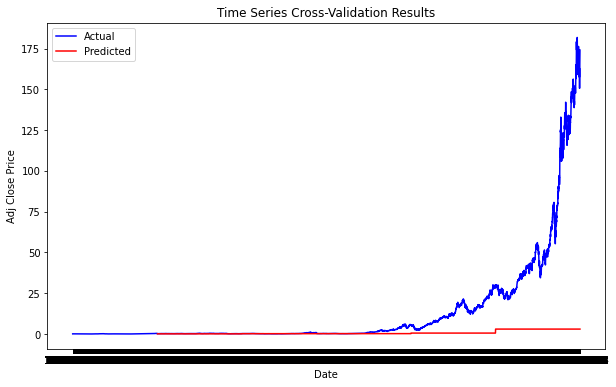

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(y.index[-len(dummy_predictions):], dummy_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Time Series Cross-Validation Results')
plt.legend()
plt.show()

## Parameter Optimization

According to the average metric results and prediction graphs, best three models are:
1. XGBRegressor
2. Randrom Forest
3. ExtraTreesRegressor

Neural network model already results very well in variance field so it is not optimized again. Linear regression has overfitted so it is not optimized either.
Here are the parameter optimizations for these 3 models.

### 1. XGBRegressor

In [20]:
tscv = TimeSeriesSplit(n_splits=7)

xgb = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)
grid.fit(X, y)
best_params = grid.best_params_

metrics = []
xgb_best_predictions = []

for fold_num, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb = XGBRegressor(**best_params) # New model with the best parameters found
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    xgb_best_predictions.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    metrics.append({'Fold': f'Fold {fold_num}', 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'Explained Variance': evs, 'MAPE': mape})

print("Best parameters:", best_params)
print()
print("Results of the model that is trained by using the best parameters:")
metrics_df = pd.DataFrame(metrics).set_index('Fold')
metrics_df

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Results of the model that is trained by using the best parameters:


,MSE,RMSE,MAE,R-squared,Explained Variance,MAPE
Fold,,,,,,
Fold 1,0.006836,0.082680,0.063631,-0.038122,0.572098,20.386467
Fold 2,0.000226,0.015030,0.014110,0.965510,0.995315,4.846220
Fold 3,0.018418,0.135714,0.064753,0.688782,0.759631,11.138646
Fold 4,0.176281,0.419858,0.205043,0.620105,0.710348,12.258478
Fold 5,20.474468,4.524872,3.449934,-1.370718,0.006622,45.900166
Fold 6,89.869187,9.479936,7.998914,-2.405775,0.018630,34.263482
Fold 7,4278.828102,65.412752,47.996123,-1.164578,0.000784,48.604656


In [21]:
metrics_df.mean()

MSE                   627.053360
RMSE                   11.438692
MAE                     8.541787
R-squared              -0.386399
Explained Variance      0.437633
MAPE                   25.342588
dtype: float64

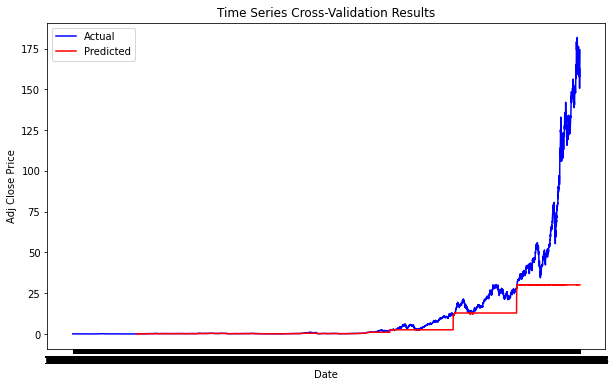

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(y.index[-len(xgb_best_predictions):], xgb_best_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Time Series Cross-Validation Results')
plt.legend()
plt.show()

### 2. Random Forest

In [32]:
tscv = TimeSeriesSplit(n_splits=7)

rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)
grid.fit(X, y)
best_params = grid.best_params_

metrics = []
rf_best_predictions = []

for fold_num, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf = RandomForestRegressor(**best_params) # New model with the best parameters found
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_best_predictions.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    metrics.append({'Fold': f'Fold {fold_num}', 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'Explained Variance': evs, 'MAPE': mape})

print("Best parameters:", best_params)
print()
print("Results of the model that is trained by using the best parameters:")
metrics_df = pd.DataFrame(metrics).set_index('Fold')
metrics_df

Best parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Results of the model that is trained by using the best parameters:


,MSE,RMSE,MAE,R-squared,Explained Variance,MAPE
Fold,,,,,,
Fold 1,0.006684,0.081754,0.062555,-0.014982,0.577910,19.948871
Fold 2,0.000222,0.014888,0.013882,0.966157,0.995282,4.773406
Fold 3,0.017839,0.133561,0.063748,0.698576,0.767244,10.964009
Fold 4,0.178859,0.422918,0.207145,0.614549,0.706729,12.382431
Fold 5,20.531483,4.531168,3.458969,-1.377320,0.007501,46.084327
Fold 6,90.375957,9.506627,8.030101,-2.424980,0.018514,34.420248
Fold 7,4279.755317,65.419839,48.000234,-1.165047,0.000514,48.610142


In [33]:
metrics_df.mean()

MSE                   627.266623
RMSE                   11.444394
MAE                     8.548091
R-squared              -0.386149
Explained Variance      0.439099
MAPE                   25.311919
dtype: float64

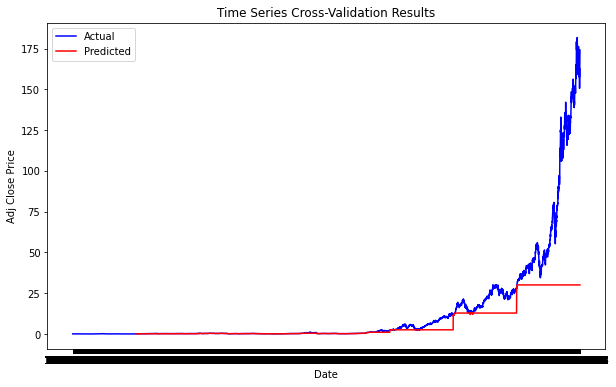

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(y.index[-len(rf_best_predictions):], rf_best_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Time Series Cross-Validation Results')
plt.legend()
plt.show()

### 3. ExtraTreesRegressor

In [35]:
tscv = TimeSeriesSplit(n_splits=7)

et = ExtraTreesRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(estimator=et, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)
grid.fit(X, y)
best_params = grid.best_params_

metrics = []
et_best_predictions = []

for fold_num, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    et = ExtraTreesRegressor(**best_params) # New model with the best parameters found
    et.fit(X_train, y_train)
    y_pred = et.predict(X_test)
    et_best_predictions.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    metrics.append({'Fold': f'Fold {fold_num}', 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'Explained Variance': evs, 'MAPE': mape})

print("Best parameters:", best_params)
print()
print("Results of the model that is trained by using the best parameters:")
metrics_df = pd.DataFrame(metrics).set_index('Fold')
metrics_df

Best parameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Results of the model that is trained by using the best parameters:


,MSE,RMSE,MAE,R-squared,Explained Variance,MAPE
Fold,,,,,,
Fold 1,0.006780,0.082338,0.063161,-0.029552,0.575001,20.167457
Fold 2,0.000216,0.014693,0.013758,0.967040,0.995794,4.728894
Fold 3,0.018183,0.134845,0.064839,0.692755,0.763793,11.206022
Fold 4,0.178134,0.422059,0.207613,0.616112,0.708696,12.638645
Fold 5,20.534231,4.531471,3.458084,-1.377638,0.006598,46.054885
Fold 6,90.004052,9.487047,8.007749,-2.410886,0.019057,34.308628
Fold 7,4280.244949,65.423581,48.005852,-1.165295,0.000539,48.620313


In [36]:
metrics_df.mean()

MSE                   627.283792
RMSE                   11.442291
MAE                     8.545865
R-squared              -0.386780
Explained Variance      0.438497
MAPE                   25.389264
dtype: float64

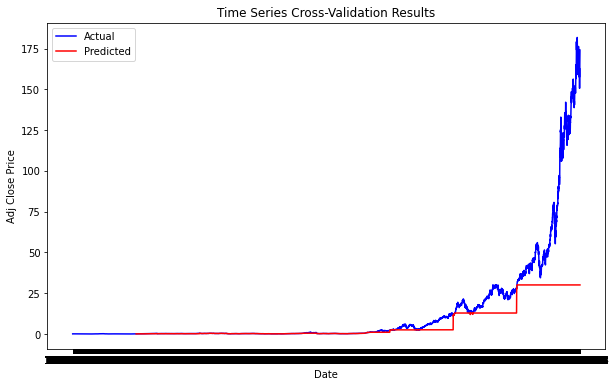

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(y.index[-len(et_best_predictions):], et_best_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Time Series Cross-Validation Results')
plt.legend()
plt.show()

In [24]:
pickle.dump(xgb, open('model.pkl','wb'))